

 Amirhossein Shanaghi

student ID:810899056



Initial condition:
Optimal solution: x = [0.         0.00049898]
Optimal function value: f(x) = 2.4898264710740134e-09
Number of iterations: 187


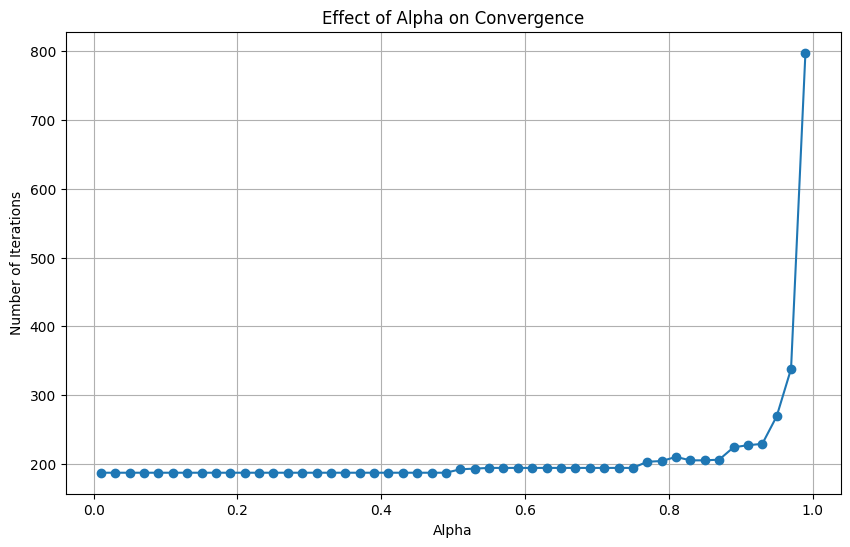

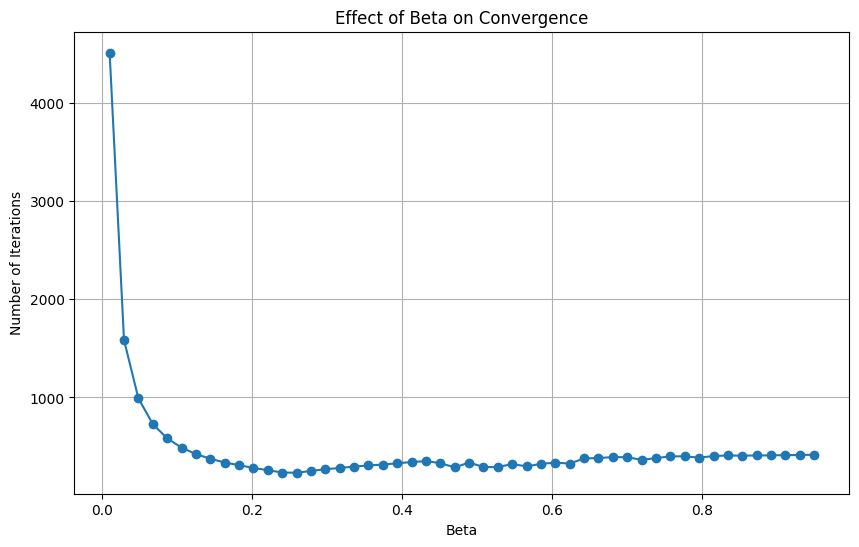

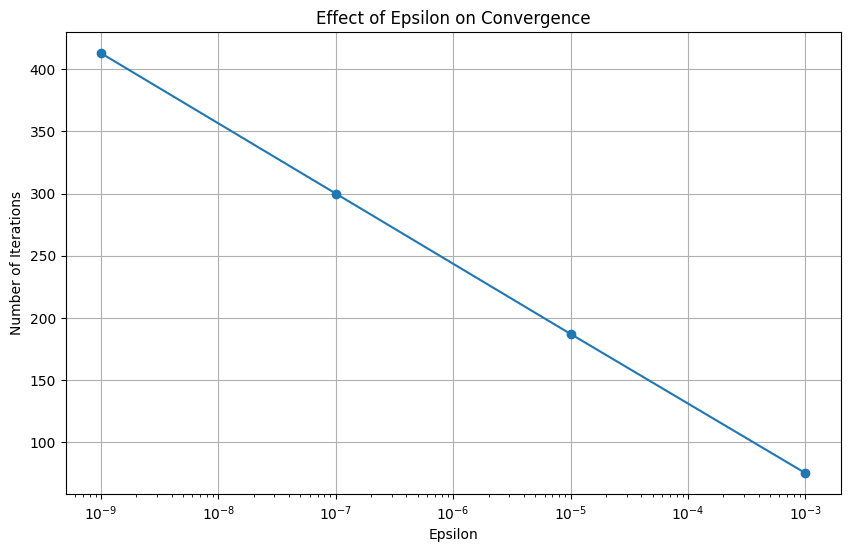

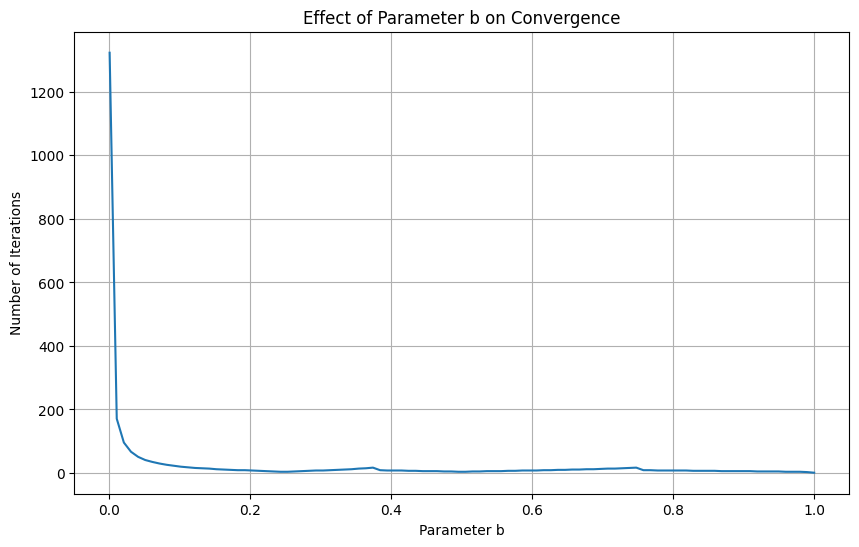

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon):
    """
    Gradient method with backtracking stepsize rule.

    Parameters:
    f (function): Objective function.
    g (function): Gradient of the objective function.
    x0 (numpy array): Initial point.
    s (float): Initial choice of stepsize.
    alpha (float): Tolerance parameter for the stepsize selection.
    beta (float): The constant in which the stepsize is multiplied at each backtracking step (0 < beta < 1).
    epsilon (float): Tolerance parameter for stopping rule.

    Returns:
    x (numpy array): Optimal solution (up to a tolerance) of min f(x).
    fun_val (float): Optimal function value.
    num_iters (int): Number of iterations taken to converge.
    """
    x = x0
    grad = g(x)
    fun_val = f(x)
    iter = 0

    while np.linalg.norm(grad) > epsilon:
        iter += 1
        t = s
        while f(x - t * grad) > fun_val - alpha * t * np.linalg.norm(grad) ** 2:
            t *= beta
        x = x - t * grad
        fun_val = f(x)
        grad = g(x)
       # print(f'iter_number = {iter:3d} norm_grad = {np.linalg.norm(grad):2.6f} fun_val = {fun_val:2.6f}')

    return x, fun_val, iter

def f(x, b):
    return x[0] ** 2 + b * x[1] ** 2

def g(x, b):
    return np.array([2 * x[0], 2 * b * x[1]])

x0 = np.array([2.0, 1.0])

# Initial Parameters
b_initial = 0.01
s = 2
alpha = 0.25
beta = 0.5
epsilon = 1e-5

# Calculate for the initial parameters
x, fun_val, num_iters = gradient_method_backtracking(lambda x: f(x, b_initial), lambda x: g(x, b_initial), x0, s, alpha, beta, epsilon)
print(f'Initial condition:\nOptimal solution: x = {x}\nOptimal function value: f(x) = {fun_val}\nNumber of iterations: {num_iters}')

alphas = np.linspace(0.01, 0.99, 50)
results_alpha = []

for a in alphas:
    _, _, num_iters = gradient_method_backtracking(lambda x: f(x, b_initial), lambda x: g(x, b_initial), x0, s, a, beta, epsilon)
    results_alpha.append((a, num_iters))

alphas, iters_alpha = zip(*results_alpha)
plt.figure(figsize=(10, 6))
plt.plot(alphas, iters_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Number of Iterations')
plt.title('Effect of Alpha on Convergence')
plt.grid(True)
plt.show()

betas =  np.linspace(0.01, 0.95, 50)
results_beta = []

for b in betas:
    _, _, num_iters = gradient_method_backtracking(lambda x: f(x, b_initial), lambda x: g(x, b_initial), x0, s, alpha, b, epsilon)
    results_beta.append((b, num_iters))

betas, iters_beta = zip(*results_beta)
plt.figure(figsize=(10, 6))
plt.plot(betas, iters_beta, marker='o')
plt.xlabel('Beta')
plt.ylabel('Number of Iterations')
plt.title('Effect of Beta on Convergence')
plt.grid(True)
plt.show()

epsilon_values = [1e-3, 1e-5, 1e-7,1e-9]
results_epsilon = []

for e in epsilon_values:
    _, _, num_iters = gradient_method_backtracking(lambda x: f(x, b_initial), lambda x: g(x, b_initial), x0, s, alpha, beta, e)
    results_epsilon.append((e, num_iters))

epsilons, iters_epsilon = zip(*results_epsilon)
plt.figure(figsize=(10, 6))
plt.plot(epsilons, iters_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of Iterations')
plt.title('Effect of Epsilon on Convergence')
plt.grid(True)
plt.xscale('log')
plt.show()

b_values = np.linspace(0.001, 1, 100)
iterations_needed = []

for b in b_values:
    _, _, num_iters = gradient_method_backtracking(lambda x: f(x, b), lambda x: g(x, b), x0, s, alpha, beta, epsilon)
    iterations_needed.append(num_iters)

plt.figure(figsize=(10, 6))
plt.plot(b_values, iterations_needed)
plt.xlabel('Parameter b')
plt.ylabel('Number of Iterations')
plt.title('Effect of Parameter b on Convergence')
plt.grid(True)
plt.show()


Initial condition:
Optimal solution: x = [0. 0.]
Optimal function value: f(x) = 0.0
Number of iterations: 1


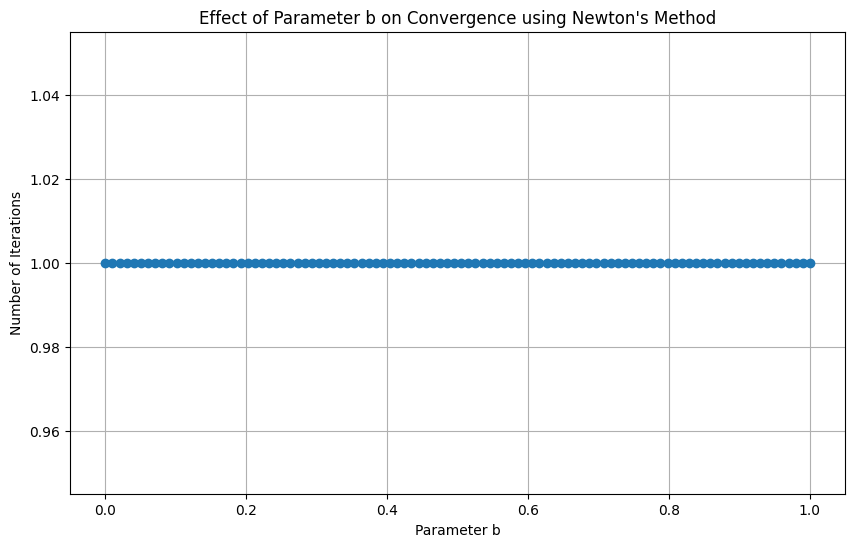

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(f, g, hessian, x0, epsilon=1e-5, max_iters=1000):
    """
    Newton's method for optimization.

    Parameters:
    f (function): Objective function.
    g (function): Gradient of the objective function.
    hessian (function): Hessian matrix of the objective function.
    x0 (numpy array): Initial point.
    epsilon (float): Tolerance parameter for stopping rule.
    max_iters (int): Maximum number of iterations to avoid divergence.

    Returns:
    x (numpy array): Optimal solution (up to a tolerance) of min f(x).
    fun_val (float): Optimal function value.
    num_iters (int): Number of iterations taken to converge.
    """
    x = x0
    iter = 0

    while np.linalg.norm(g(x)) > epsilon and iter < max_iters:
        iter += 1
        grad = g(x)
        hess = hessian(x)
        try:
            hess_inv = np.linalg.inv(hess)
        except np.linalg.LinAlgError:
            print(f"Divergence detected at iteration {iter}: Hessian is singular.")
            return x, f(x), -1

        x = x - hess_inv @ grad
        if iter % 10 == 0:  # Print every 10 iterations to avoid too much output
            print(f'iter_number = {iter:3d} norm_grad = {np.linalg.norm(grad):2.6f} fun_val = {f(x):2.6f}')

    if iter >= max_iters:
        print(f"Divergence detected: reached maximum iterations ({max_iters}) without convergence.")
        return x, f(x), -1

    return x, f(x), iter

def f(x, b):
    return x[0] ** 2 + b * x[1] ** 2

def g(x, b):
    return np.array([2 * x[0], 2 * b * x[1]])

def hessian(x, b):
    return np.array([[2, 0], [0, 2 * b]])

# Initial point
x0 = np.array([2.0, 1.0])

# Initial Parameters
b_initial = 0.01
epsilon = 1e-5

# Calculate for the initial condition
x, fun_val, num_iters = newton_method(lambda x: f(x, b_initial), lambda x: g(x, b_initial), lambda x: hessian(x, b_initial), x0, epsilon)
print(f'Initial condition:\nOptimal solution: x = {x}\nOptimal function value: f(x) = {fun_val}\nNumber of iterations: {num_iters}')

# Varying parameter b from 0.001 to 1
b_values = np.linspace(0.001, 1, 100)
iterations_needed = []

for b in b_values:
    _, _, num_iters = newton_method(lambda x: f(x, b), lambda x: g(x, b), lambda x: hessian(x, b), x0, epsilon)
    iterations_needed.append(num_iters)

plt.figure(figsize=(10, 6))
plt.plot(b_values, iterations_needed, marker='o')
plt.xlabel('Parameter b')
plt.ylabel('Number of Iterations')
plt.title('Effect of Parameter b on Convergence using Newton\'s Method')
plt.grid(True)
plt.show()


# Report on Gradient Backtracking and Newton's Method Optimization

#### Introduction
This report analyzes the optimization of a quadratic function \( f(x) = x_1^2 + bx_2^2 \) using the Gradient Backtracking Method and Newton's Method. The goal is to evaluate the impact of various parameters on the convergence behavior of these methods.

### Gradient Backtracking Method

#### Implementation
The gradient backtracking method minimizes the function using the following gradient and parameters:
- **Gradient**: \( [2x_1, 2bx_2] \)
- **Initial point**: \( x0 = [2.0, 1.0] \)
- **Initial parameters**: \( s = 2 \), \( alpha = 0.25 \), \( beta = 0.5 \), \( epsilon = 1e-5 \)

#### Initial Condition
For the initial condition with \( b = 0.01 \):
- **Optimal solution**: \( x = [0.0, 0.00049898] \)
- **Optimal function value**: \( f(x) = 2.4898264710740134e-09 \)
- **Number of iterations**: 187

#### Varying Parameters

**1. Effect of Varying \( alpha \)**

- **Range**:  **alpha**  was varied between 0.01 and 0.99 with 50 equally spaced values.
- **Results**: As  **alpha**  increases, the number of iterations initially remains stable and then increases sharply as  **alpha**  approaches 1. This behavior indicates that overly large values  **alpha** (alpha>1) cause instability and a failure to converge efficiently.(also alpha=1 make it diverge!

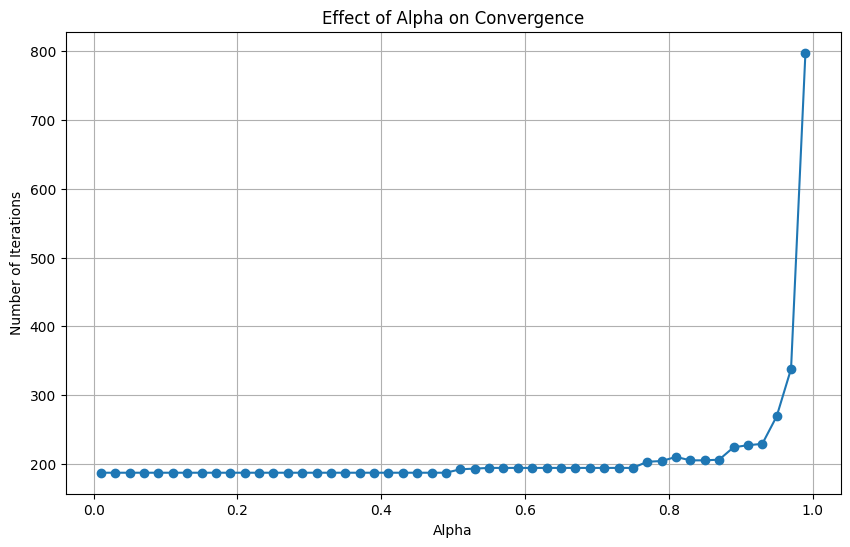



**2. Effect of Varying \( beta \)**

- **Range**: \( beta \) was varied between 0.01 and 0.95 with 50 equally spaced values.
- **Results**: Beta is the constant that determines how much the step size is reduced at each backtracking step.Smaller \( beta \) values lead to a higher number of iterations due to more aggressive step size reductions, increases the computational cost. The number of iterations decreases significantly as \( beta \) increases, best performance around 0.3 to 0.4.


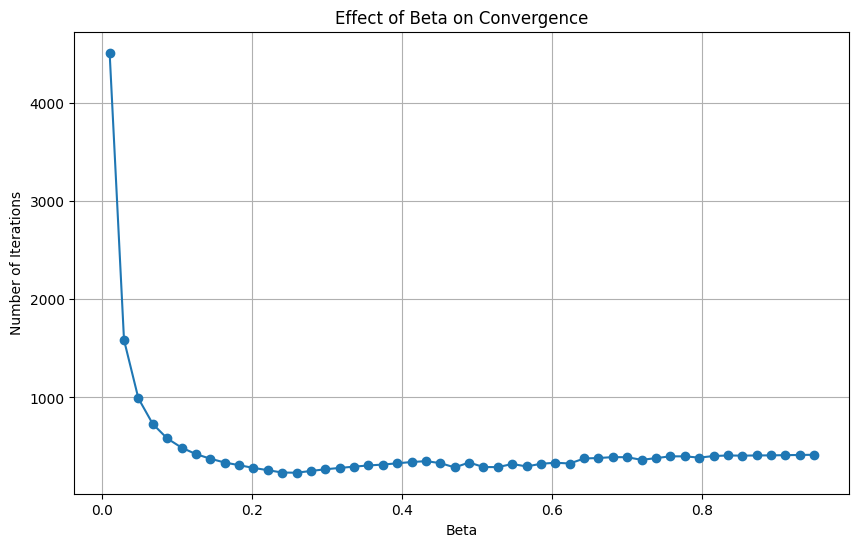




**3. Effect of Varying \( epsilon \)**

- **Values**: \( epsilon \) values used were \( 1e-3, 1e-5, 1e-7, 1e-9 \).
- **Results**: As \( epsilon \) decreases (higher precision), the number of iterations required to converge increases. This is expected as the algorithm needs to achieve a finer precision, thus requiring more iterations.

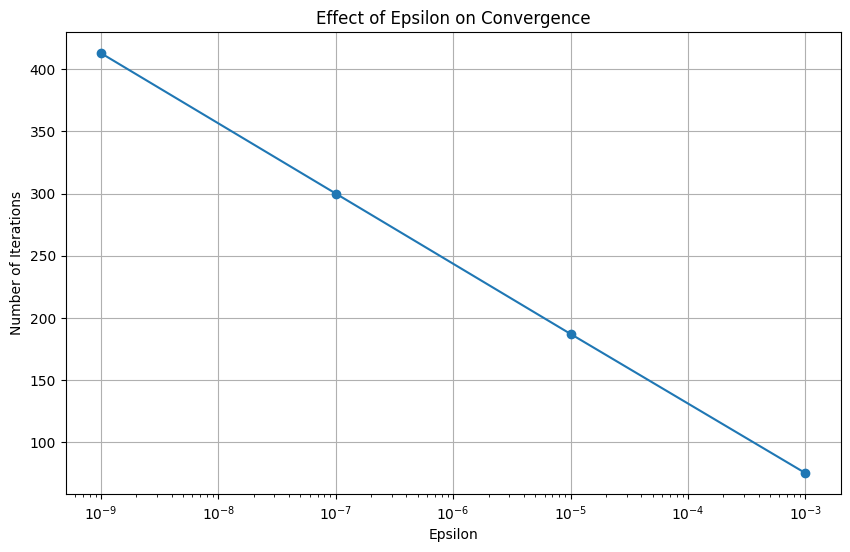



**4. Effect of Varying Parameter \( b \)**

- **Range**: \( b \) was varied from 0.001 to 1 with 100 equally spaced values.
- **Results**: The number of iterations decreases rapidly as \( b \) increases from 0.001 to around 0.05, and then stabilizes. This indicates that higher values of \( b \) make the function easier to minimize along the \( y \)-axis.

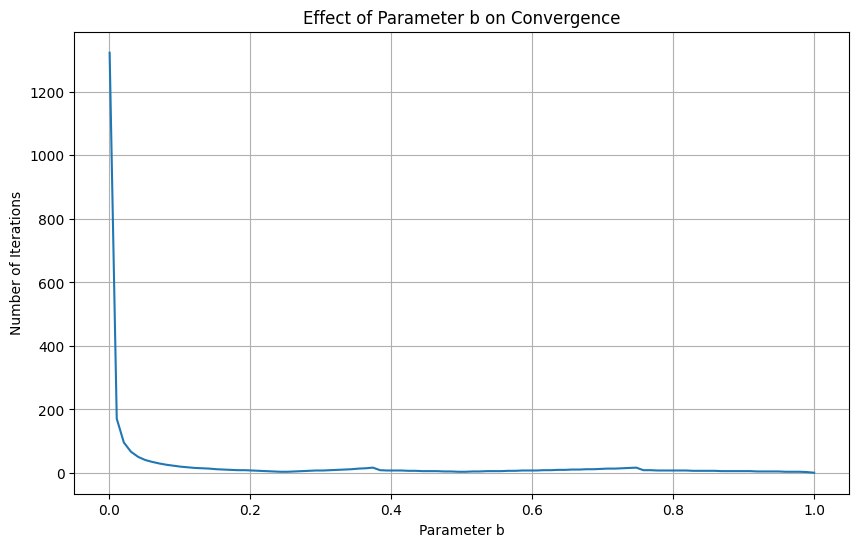



### Newton's Method

#### Implementation
Newton's method minimizes the function using the following Hessian and parameters:
- **Hessian**:  H(f) = \begin{bmatrix} 2 & 0 \\ 0 & 2 \ b \end{bmatrix} \
- **Initial point**: \( x0 = [2.0, 1.0] \)
- **Initial parameter**: \( epsilon = 1e-5 \)

#### Initial Condition
For the initial condition with \( b = 0.01 \):
- **Optimal solution**: \( x = [0.0, 0.0] \)
- **Optimal function value**: \( f(x) = 0.0 \)
- **Number of iterations**: 1

#### Varying Parameter \( b \)
- **Range**: \( b \) was varied from 0.001 to 1 with 100 equally spaced values.
- **Results**: Newton's method  converges in only 1  iteration regardless of the value of \( b \), demonstrating its efficiency for quadratic functions.

### Conclusion
The analysis shows the significant impact of various parameters on the convergence behavior of the gradient backtracking method and Newton's method. Key findings include:
- **Gradient Backtracking Method**:
  - Smaller \( alpha \) and \( beta \) values result in more iterations.
  - Higher precision (\( epsilon \)) increases iterations.
  - Increasing \( b \) reduces iterations, making the function easier to minimize along the \( y \)-axis.

- **Newton's Method**:


  - solved in only 1  iteration regardless of the value of \( b \), demonstrating its superior efficiency for quadratic functions.



### Detailed Figures and Analysis

**1. Effect of Alpha on Convergence (Gradient Backtracking Method)**
- The number of iterations required for convergence remains relatively stable for \( alpha \) values up to around 0.8. Beyond this point, the number of iterations increases sharply, indicating that the method struggles to converge efficiently with high \( alpha \) values.

**2. Effect of Beta on Convergence (Gradient Backtracking Method)**
- Smaller \( beta \) values (more aggressive step size reduction) lead to a higher number of iterations. As \( beta \) increases, the number of iterations required decreases significantly and stabilizes around \( beta = 0.3 \) to \( beta = 0.4 \).

**3. Effect of Epsilon on Convergence (Gradient Backtracking Method)**
- Higher precision (smaller \( epsilon \) values) increases the number of iterations required for convergence. This is expected as achieving finer precision necessitates more iterative steps.

**4. Effect of Parameter b on Convergence (Gradient Backtracking Method)**
- The number of iterations required for convergence decreases rapidly as \( b \) increases from 0.001 to around 0.05, after which it stabilizes. Higher \( b \) values make the function easier to minimize along the \( y \)-axis, reducing the number of iterations.

**5. Effect of Parameter b on Convergence (Newton's Method)**
- Newton's method consistently converges in a minimal number of iterations, demonstrating its effectiveness for quadratic functions regardless of the \( b \) value.

### Conclusion

This report has demonstrated the importance of parameter tuning in the gradient backtracking method and highlighted the efficiency of Newton's method for quadratic functions. The analysis and visualizations provide insights into how different parameters influence the convergence behavior of these optimization methods, offering guidance for their practical implementation.

